In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import linear_model
np.set_printoptions(suppress=True)

In [456]:
def genData(numPoints, slope, intercept):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    
    x[:,0] = 1
    x[:,1] = np.random.uniform(-2, 2, size = numPoints)
    
    for i in range(0, numPoints): y[i] = (x[i][1] * slope) + (intercept + np.random.normal(0,4))
    
    return x, y

In [457]:
x, y = genData(100, 3, 2)

## 4A (i): Analytical Least Sqaures

In [458]:
def analytical_linear_regression_ridge(x_train, y_train, lamb):
    
    X = np.array(x_train)
    y = np.array(y_train)
    
    Xt = transpose(X)
    product = dot(Xt, X) + lamb
    #print (product)
    theInverse = inv(product)
    w = dot(dot(theInverse, Xt), y)
    
    return w

In [459]:
analytical_linear_regression(x,y)

array([2.10895163, 3.04420866])

## 4A (ii): Analytical Ridge Regression

In [461]:
def analytical_linear_regression_ridge(x_train, y_train, lamb):
    
    X = np.array(x_train)
    y = np.array(y_train)
    
    Xt = transpose(X)
    product = dot(Xt, X) + lamb
    #print (product)
    theInverse = inv(product)
    w = dot(dot(theInverse, Xt), y)
    
    return w

In [462]:
analytical_linear_regression_ridge(x, y, 5)

array([1.87243346, 2.86548333])

Ridge regression appears to be supressing the coefficient values

## 4A (iii) Batch GD Lasso

In [463]:
def gradientDescentLasso(x, y, theta, alpha, m, numIterations, lamb):
    
    xTrans = x.transpose()
    for i in range(0, numIterations):
        
        #hypothesis = np.dot(x, theta)
            
        #loss = hypothesis - y
     
        cost = (np.sum((np.dot(x, theta) - y) ** 2) / (2 * m)) + np.sum(theta) * lamb
        
        #print("Iteration %d | Cost: %f" % (i, cost))
        
        gradient = (np.dot(xTrans, np.dot(x, theta) - y)/m) + (lamb * np.sign(theta))#Partial derivative        
        theta = theta - alpha * gradient
        
        #print ('gradient' + str(gradient))
        #print ('theta' + str(theta))
    
    return theta

### Comparing Custom vs Lasso

In [521]:
x, y = genData(100, -30, 2)
x = add_poly(x,6)
m, n = np.shape(x) 

theta = gradientDescentLasso(x, y, np.ones(n), 0.001, m, 100000, 4)
print([i if (i > 0.09) or (i < -0.09) else 0 for i in theta])
#print (theta)

[0, -19.920615775965658, 0, -3.1104933667080994, 0, 0, 0]


In [522]:
lasso_test = sklearn.linear_model.Lasso(alpha=4, max_iter=100000)
lasso_test.fit(x,y).coef_

array([  0.        , -19.42116048,  -0.        ,  -3.30212496,
         0.        ,  -0.        ,   0.        ])

The results of the custom lasso function matches one of sklearn.

## 4B

In [484]:
def add_poly(x, degree):

    for i in range(2, degree+1):
        
        #x[:, degree] = x[:,1] ** degree
        x = np.column_stack((x,x[:,1].copy() ** i))
    
    return x

x, y = genData(100, 3, 2)
x = add_poly(x,6)

In [486]:
thetas_lasso = []
thetas_ridge = []
thetas_analytical = []

for i in range(100):

    x, y = genData(100, 3, 2)
    m, n = np.shape(x)
    numIterations= 5000
    alpha = 0.001
    x = add_poly(x,5)
    m, n = np.shape(x)
    
    thetas_analytical.append(analytical_linear_regression(x, y))
    thetas_ridge.append(analytical_linear_regression_ridge(x,y, 5))
    thetas_lasso.append(gradientDescentLasso(x, y, np.ones(n), alpha, m, numIterations, 5))
    

## 4C

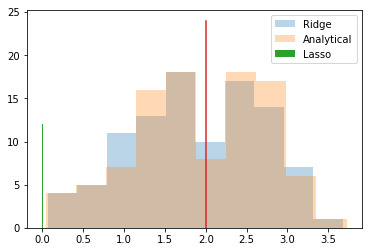

In [487]:
plt.hist(np.array(thetas_ridge)[:,0], label = 'Ridge', alpha = .3)
plt.hist(np.array(thetas_analytical)[:,0], label = 'Analytical', alpha = 0.3)
plt.hist(np.array(thetas_lasso)[:,0], label = 'Lasso', alpha = 1)


plt.plot([2 for i in range (25)], [i for i in range(25)])


plt.legend()
plt.show()

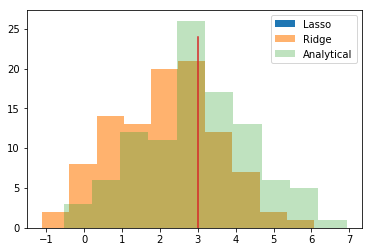

In [488]:
plt.hist(np.array(thetas_lasso)[:,1], label = 'Lasso', alpha = 1)
plt.hist(np.array(thetas_ridge)[:,1], label = 'Ridge', alpha = 0.6)
plt.hist(np.array(thetas_analytical)[:,1], label = 'Analytical', alpha = 0.3)



plt.plot([3 for i in range (25)], [i for i in range(25)])


plt.legend()
plt.show()

## 4C

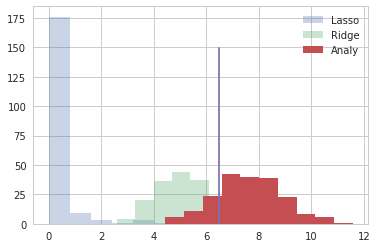

In [647]:
plt.hist(sum(np.dot(1.5,transpose(thetas_lasso))), label = 'Lasso', alpha = 0.3)
plt.hist(sum(np.dot(1.5,transpose(thetas_ridge))), label = 'Ridge', alpha = 0.3)
plt.hist(sum(np.dot(1.5,transpose(thetas_analytical))), label = 'Analy', alpha = 1)

plt.plot([6.5 for i in range (150)], [i for i in range(150)])


plt.legend()
plt.show()


## 4D

In [491]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

In [492]:
thetas_lasso = []
thetas_ridge = []
thetas_analytical = []

for lamb in frange(0, 20, 0.1):

    x, y = genData(100, 3, 2)
    m, n = np.shape(x)
    numIterations= 5000
    alpha = 0.001
    x = add_poly(x,5)
    m, n = np.shape(x)
    
    thetas_analytical.append(analytical_linear_regression(x, y))
    thetas_ridge.append(analytical_linear_regression_ridge(x,y, lamb))
    thetas_lasso.append(gradientDescentLasso(x, y, np.ones(n), alpha, m, numIterations, lamb))
    

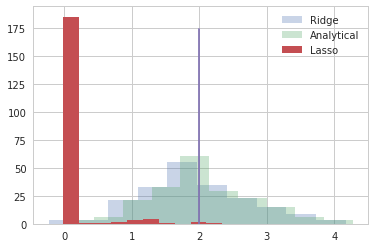

In [650]:
plt.hist(np.array(thetas_ridge)[:,0], label = 'Ridge', alpha = .3)
plt.hist(np.array(thetas_analytical)[:,0], label = 'Analytical', alpha = 0.3)
plt.hist(np.array(thetas_lasso)[:,0], label = 'Lasso', alpha = 1)


plt.plot([2 for i in range (175)], [i for i in range(175)])


plt.legend()
plt.show()

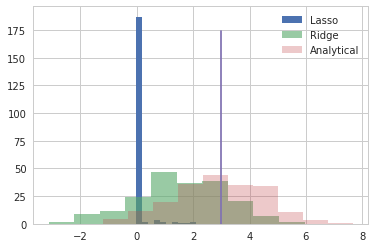

In [648]:
plt.hist(np.array(thetas_lasso)[:,1], label = 'Lasso', alpha = 1)
plt.hist(np.array(thetas_ridge)[:,1], label = 'Ridge', alpha = 0.6)
plt.hist(np.array(thetas_analytical)[:,1], label = 'Analytical', alpha = 0.3)



plt.plot([3 for i in range (175)], [i for i in range(175)])


plt.legend()
plt.show()

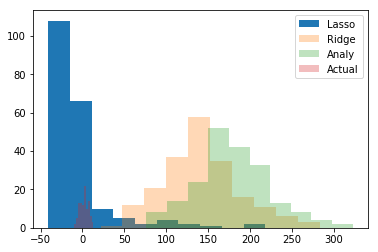

In [512]:
plt.hist(sum(np.dot(x,transpose(thetas_lasso))), label = 'Lasso', alpha = 1)
plt.hist(sum(np.dot(x,transpose(thetas_ridge))), label = 'Ridge', alpha = 0.3)
plt.hist(sum(np.dot(x,transpose(thetas_analytical))), label = 'Analy', alpha = 0.3)

plt.hist(y, label = 'Actual', alpha = 0.3)

plt.legend()
plt.show()

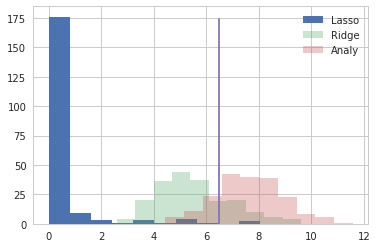

In [649]:
plt.hist(sum(np.dot(1.5,transpose(thetas_lasso))), label = 'Lasso', alpha = 1)
plt.hist(sum(np.dot(1.5,transpose(thetas_ridge))), label = 'Ridge', alpha = 0.3)
plt.hist(sum(np.dot(1.5,transpose(thetas_analytical))), label = 'Analy', alpha = 0.3)

plt.plot([6.5 for i in range (175)], [i for i in range(175)])

plt.legend()
plt.show()
#True Value?

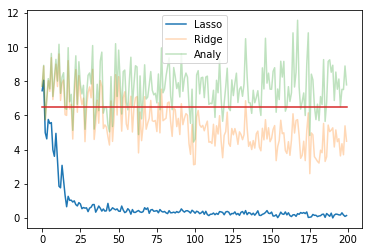

In [504]:
plt.plot(sum(np.dot(1.5,transpose(thetas_lasso))), label = 'Lasso', alpha = 1)
plt.plot(sum(np.dot(1.5,transpose(thetas_ridge))), label = 'Ridge', alpha = 0.3)
plt.plot(sum(np.dot(1.5,transpose(thetas_analytical))), label = 'Analy', alpha = 0.3)

plt.plot([i for i in range(200)], [6.5 for i in range (200)])

plt.legend()
plt.show()

x axis: lambda | y axis: prediction

## Comments and Summary



It is observed that Lasso and Ridge force down the coefficients of the regression equations. Lasso much more aggresively than ridge as seen in the above plot. While this may be useful in complex models, in this particular problem where our simulated data is randomly distributed around y = 2x + 3, analytical regression appears to work the best. 

It can also be noted that the models perform the best for lambda < 1 in Lasso and lambda < 100 in Ridge.

## 5A

In [737]:
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection

In [569]:
df = pd.read_csv("hw2_dataset.txt", delim_whitespace=True, names=['sales_price', 'finished_sq_ft', 'no_of_bedroom', 'no_of_bathroom', 'ac', 'garage_size', 'pool', 'year_built',
                                                                  'quality', 'style', 'lot_size', 'adj_hwy'])
                                                                  
                                                                  

### Split to train, test and validate

In [570]:
train_X, test_X = train_test_split(df, test_size=200)
train_X, validate_X = train_test_split(train_X, train_size=200)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [571]:
train_Y = train_X[['sales_price']]
test_Y = test_X[['sales_price']]
validate_Y = validate_X[['sales_price']]

train_X = train_X.iloc[:, 1:]
test_X = test_X.iloc[:, 1:]
validate_X = validate_X.iloc[:, 1:]

### Visualize the distribition of the features

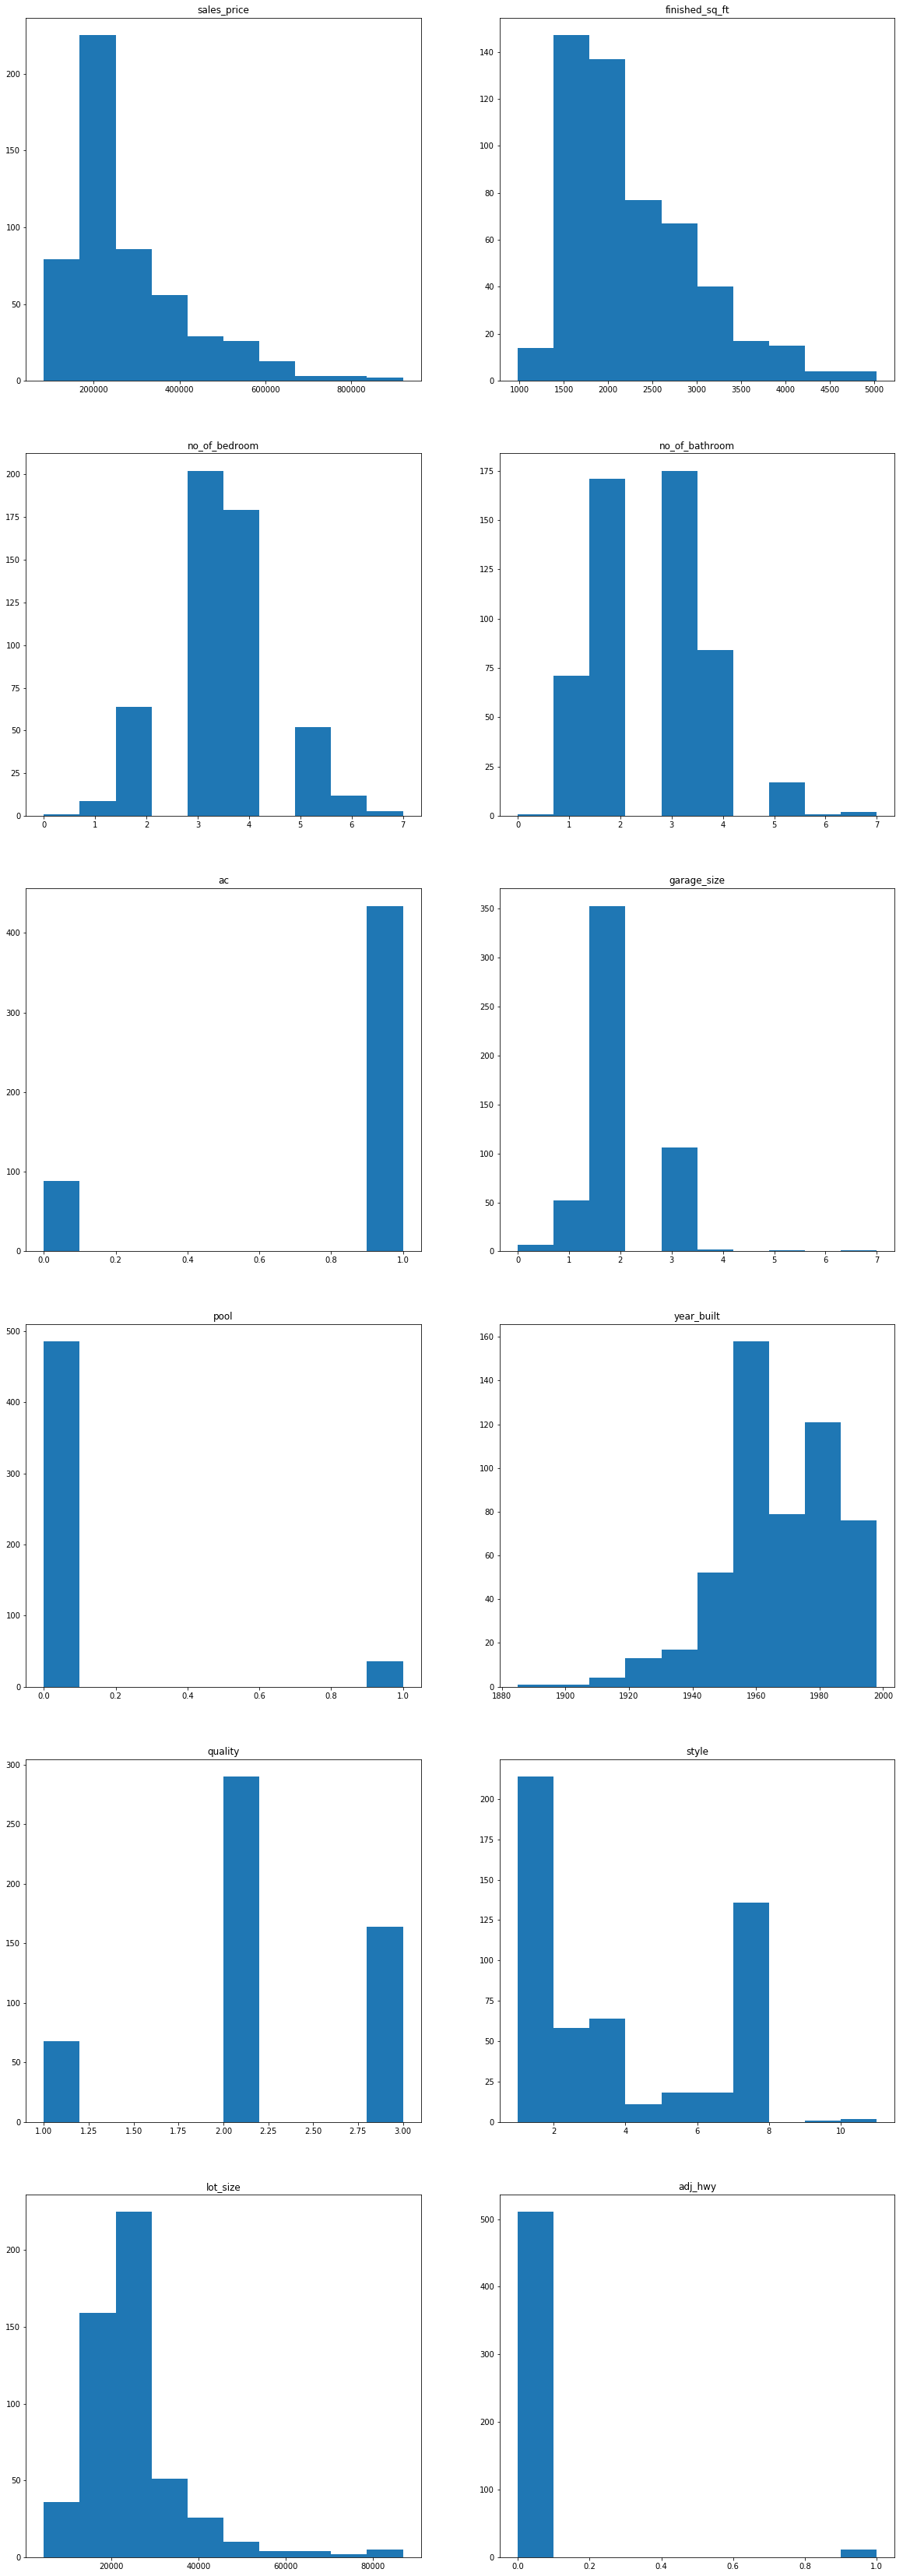

In [580]:
fig, axs = plt.subplots(6,2, figsize=(20, 60), facecolor='white', edgecolor='w')
axs = axs.ravel()

for index, col in enumerate(df.columns):
    
    axs[index].hist(df[col])
    axs[index].set_title(col)

### Eyeball variance and correlations

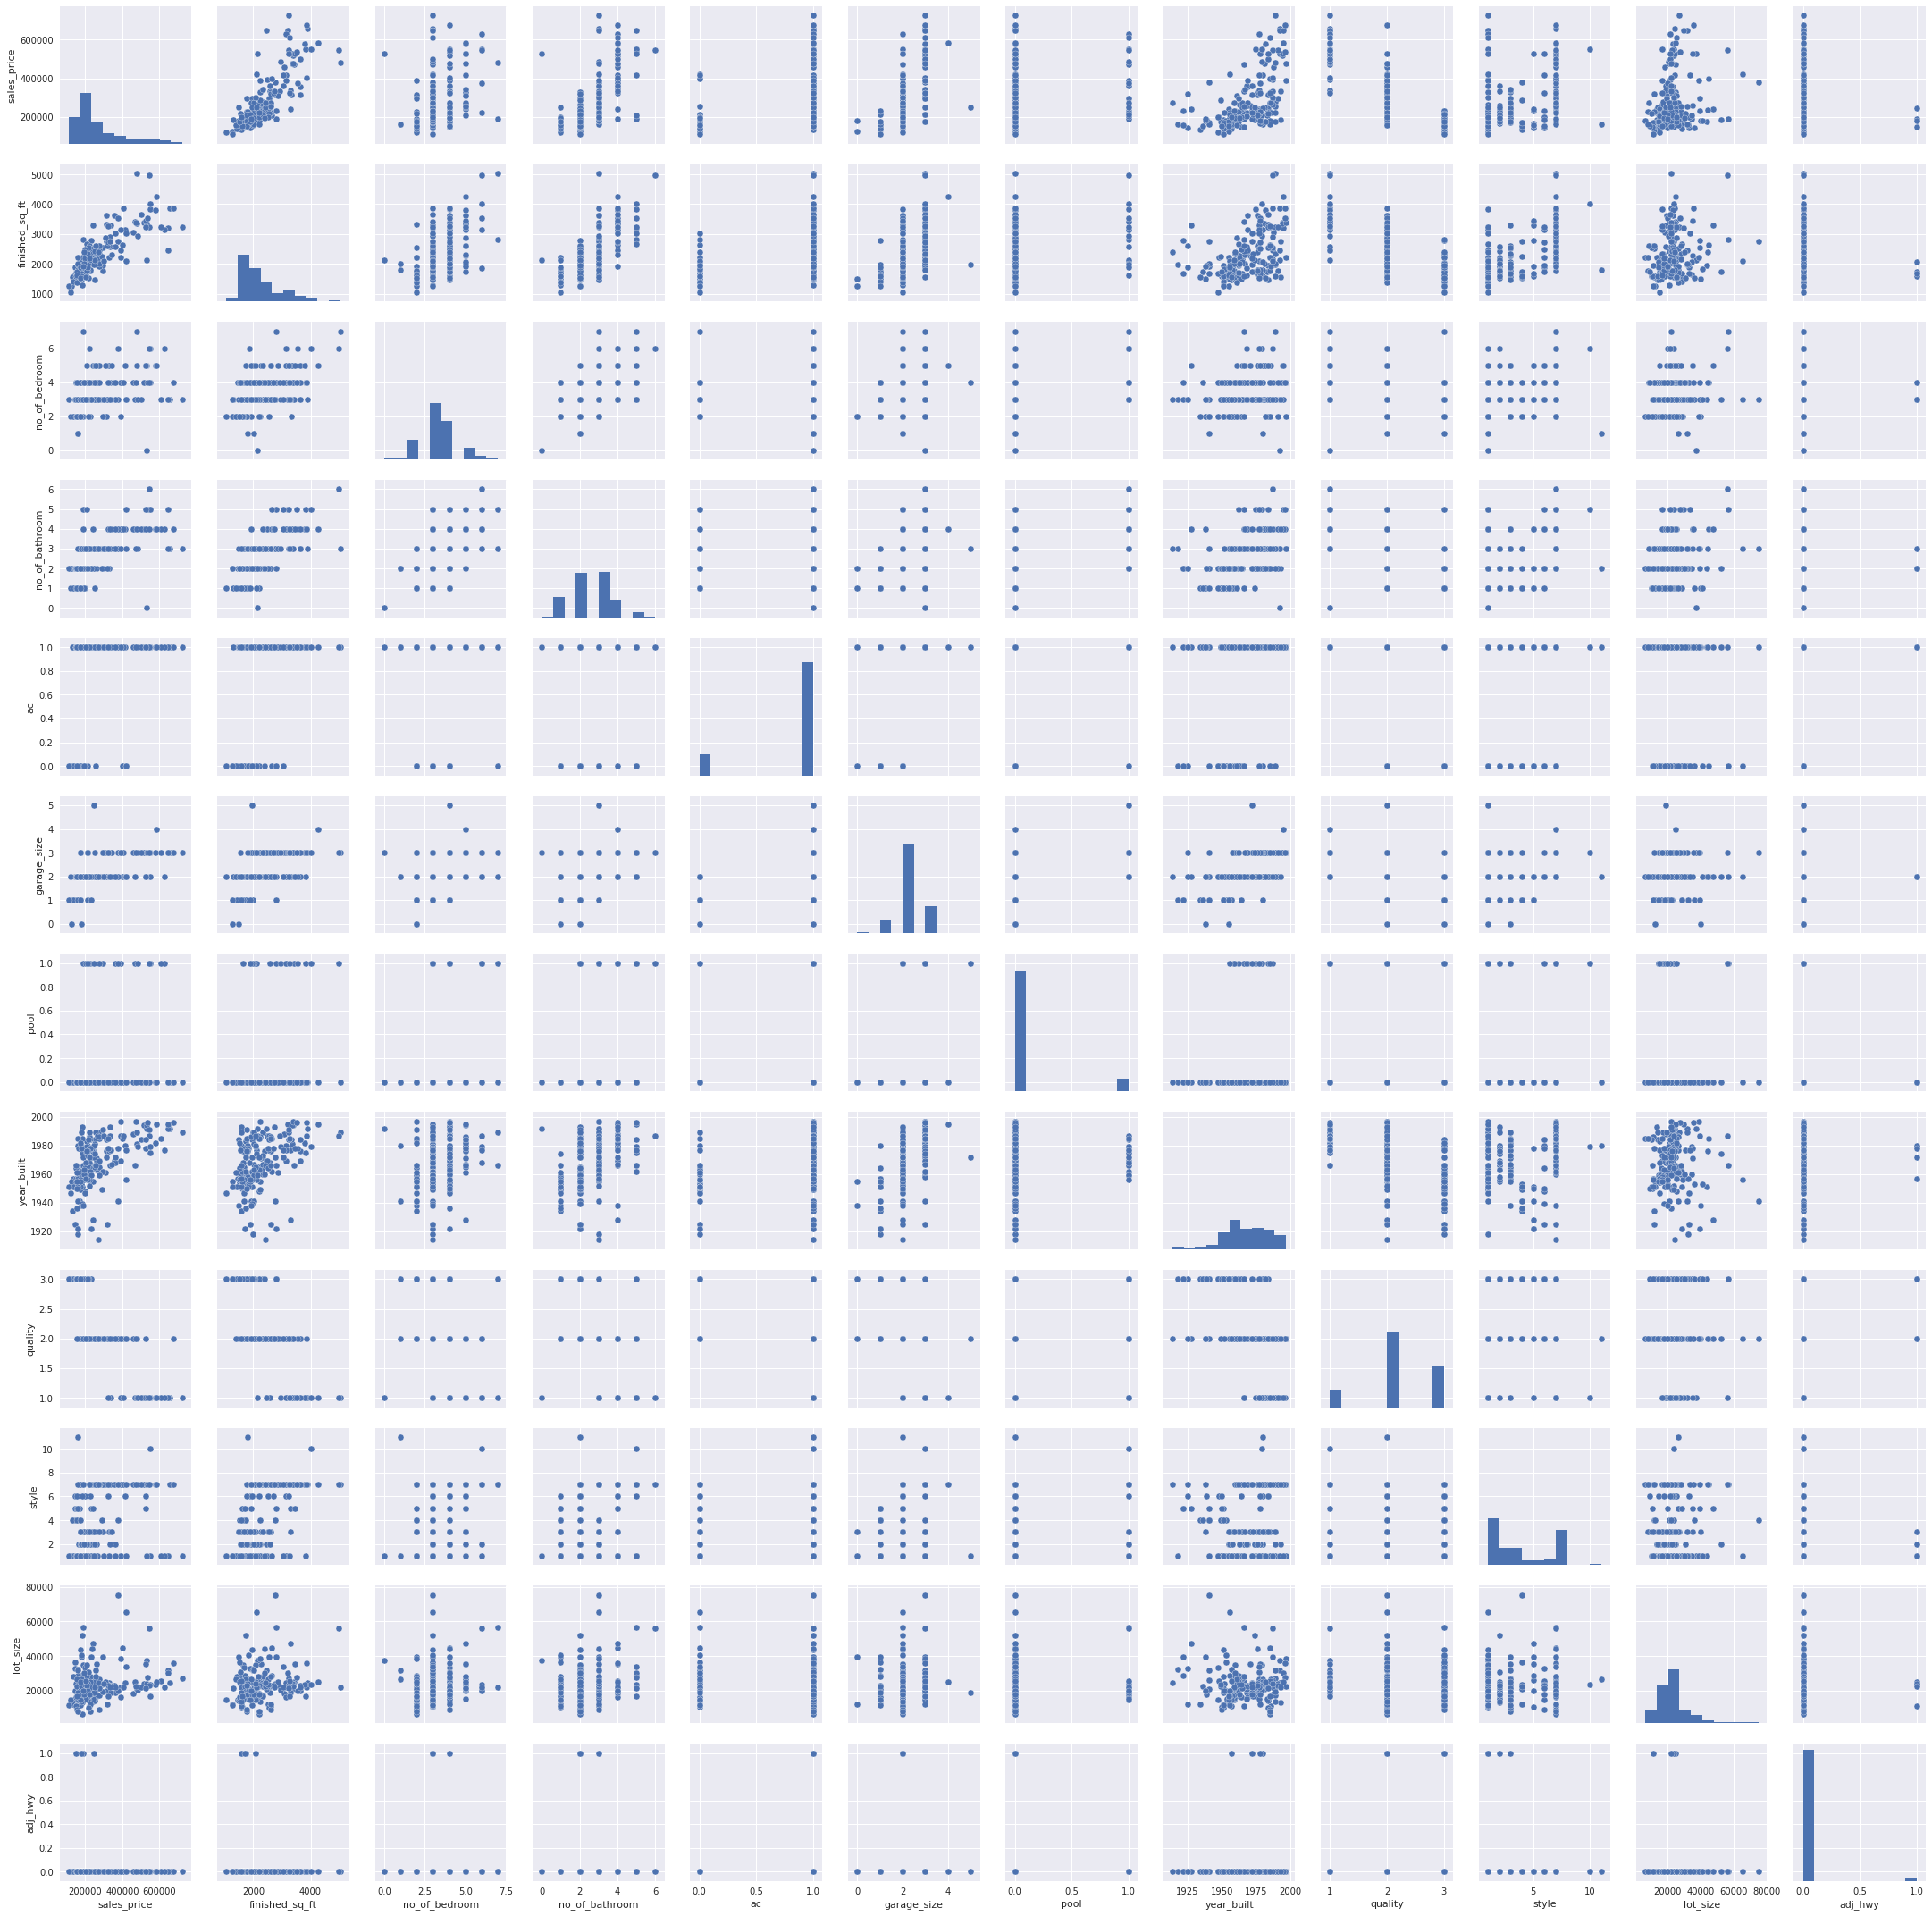

In [616]:
sns.pairplot(train, vars=df.columns)
plt.show()

### Lot size, Year Built and Finished Square Feet seem to be good predictors at first glance

### Lets take a closer look

In [604]:
def plot_corr(df,size):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

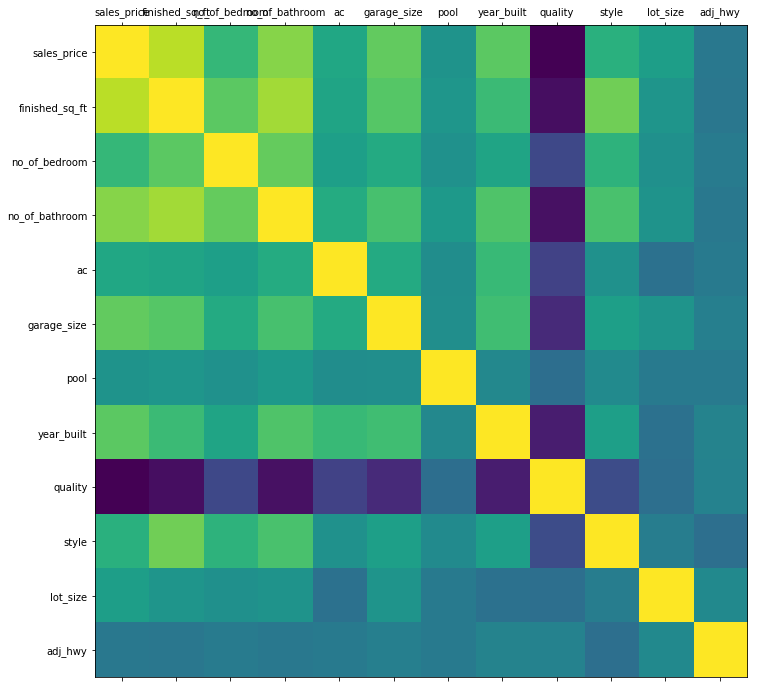

In [605]:
plot_corr(df, 12)

In [608]:
df.corr()

,sales_price,finished_sq_ft,no_of_bedroom,no_of_bathroom,ac,garage_size,pool,year_built,quality,style,lot_size,adj_hwy
sales_price,1.000000,0.819470,0.413324,0.683685,0.288596,0.577786,0.146612,0.555516,-0.758078,0.357493,0.224169,-0.050968
finished_sq_ft,0.819470,1.000000,0.557838,0.755273,0.267950,0.533766,0.162396,0.441197,-0.695553,0.616842,0.157525,-0.060625
no_of_bedroom,0.413324,0.557838,1.000000,0.583447,0.234651,0.316814,0.134542,0.268692,-0.378322,0.380370,0.126538,-0.028744
no_of_bathroom,0.683685,0.755273,0.583447,1.000000,0.324760,0.489898,0.184153,0.512841,-0.682215,0.492983,0.147007,-0.050928
ac,0.288596,0.267950,0.234651,0.324760,1.000000,0.319281,0.102361,0.425588,-0.413768,0.130594,-0.105305,-0.040814
garage_size,0.577786,0.533766,0.316814,0.489898,0.319281,1.000000,0.108932,0.461760,-0.547097,0.234848,0.152219,-0.001955
pool,0.146612,0.162396,0.134542,0.184153,0.102361,0.108932,1.000000,0.059829,-0.125303,0.081456,-0.036851,-0.039932
year_built,0.555516,0.441197,0.268692,0.512841,0.425588,0.461760,0.059829,1.000000,-0.617526,0.234059,-0.100452,0.025777
quality,-0.758078,-0.695553,-0.378322,-0.682215,-0.413768,-0.547097,-0.125303,-0.617526,1.000000,-0.348077,-0.116057,0.020336
style,0.357493,0.616842,0.380370,0.492983,0.130594,0.234848,0.081456,0.234059,-0.348077,1.000000,-0.013115,-0.118740


In [656]:
ordinal_vars = ['no_of_bedroom', 'no_of_bathroom', 'ac', 'pool', 'year_built', 'quality', 'style', 'adj_hwy', 'garage_size']
cont_vars    = list(set(df.columns) - set(ordinal_vars) - set(['sales_price']))

model = smf.ols(formula='sales_price~' +  '+'.join(list(df.columns[1:])), data=df)
yhat, resid = model.fit().fittedvalues , model.fit().resid


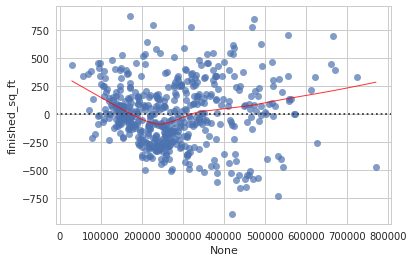

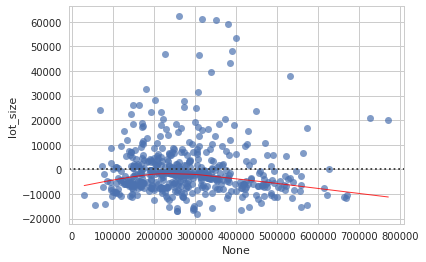

In [657]:
for i in cont_vars:
    sns.residplot(yhat, df[i], data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.7}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plt.show()

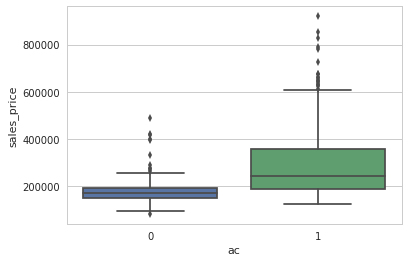

In [654]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df['ac'] , y=df["sales_price"])

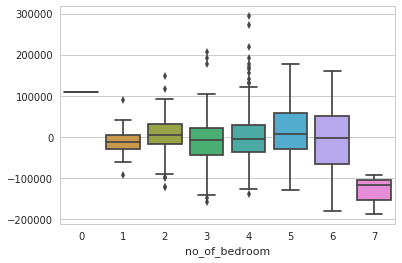

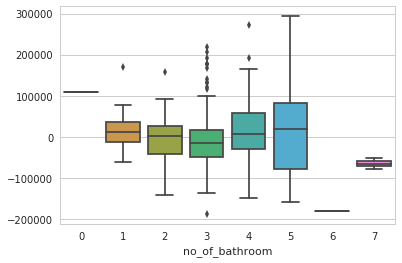

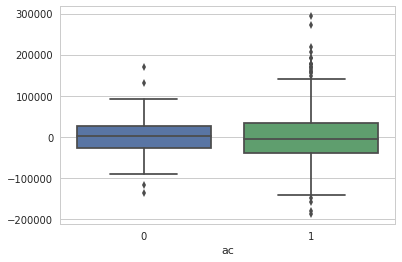

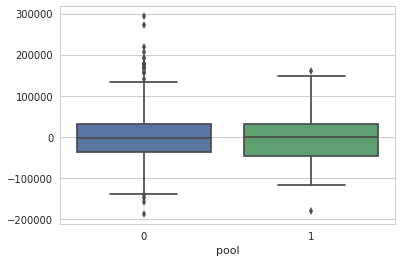

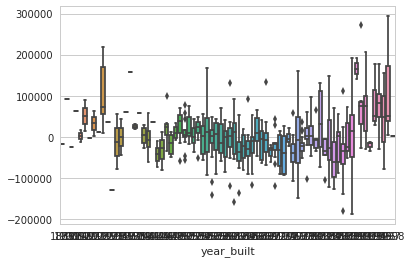

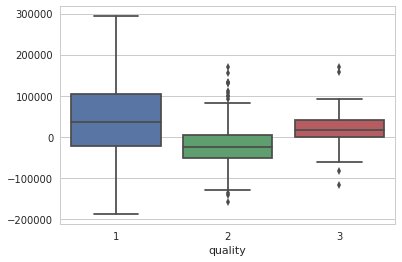

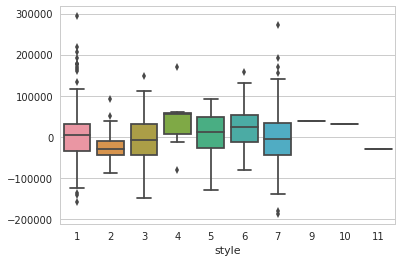

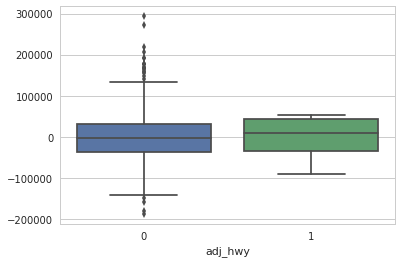

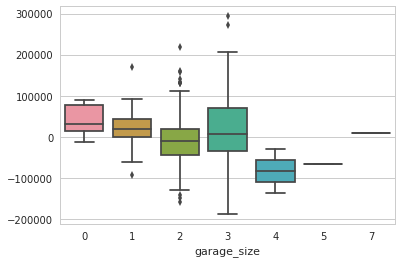

In [659]:
for i in ordinal_vars:
    sns.boxplot(y=resid , x = df[i])
    plt.show()

## Both continous variables look normally distributed with their residuals having no pattern. There appears to be slight negatove correlation in the residuals of bedrooms and bathrooms at higher number of bedroom/bathrooms. 


## Feature Selection

In [666]:
df.corr()['sales_price'].sort_values()

quality          -0.758078
adj_hwy          -0.050968
pool              0.146612
lot_size          0.224169
ac                0.288596
style             0.357493
no_of_bedroom     0.413324
year_built        0.555516
garage_size       0.577786
no_of_bathroom    0.683685
finished_sq_ft    0.819470
sales_price       1.000000
Name: sales_price, dtype: float64

### pool, lot_size, AC, no_of_bedroom, year_built and garage size seem to be the best features according to the correlation matrix. Checking Lasso

In [716]:
lasso = sklearn.linear_model.Lasso(alpha=5000)

lasso.fit(train_X, train_Y)
yhat = lasso.predict(test_X)

sklearn.metrics.r2_score(yhat, test_Y)
list(zip(lasso.coef_,train_X.columns))

[(150.73292204429302, 'finished_sq_ft'),
 (-0.0, 'no_of_bedroom'),
 (0.0, 'no_of_bathroom'),
 (0.0, 'ac'),
 (903.9011231145407, 'garage_size'),
 (0.0, 'pool'),
 (1443.231910666321, 'year_built'),
 (-16999.423032695362, 'quality'),
 (-8582.96089212173, 'style'),
 (1.5398623473056685, 'lot_size'),
 (-0.0, 'adj_hwy')]

### Looks like lasso needs a very large alpha to feature select. High sale_price could be affecting this. Log tranforming sale_price

In [717]:
lasso = sklearn.linear_model.Lasso(alpha=0.01)
lasso.fit(train_X, np.log(train_Y))

yhat = lasso.predict(test_X)

sklearn.metrics.r2_score(yhat, test_Y)
list(zip(lasso.coef_,train_X.columns))

[(0.0003950393176841929, 'finished_sq_ft'),
 (0.0, 'no_of_bedroom'),
 (0.015435329286820208, 'no_of_bathroom'),
 (0.0, 'ac'),
 (0.034868752672289734, 'garage_size'),
 (0.0, 'pool'),
 (0.004243370662446476, 'year_built'),
 (-0.09932725241921879, 'quality'),
 (-0.01629751896049492, 'style'),
 (6.0546711817545355e-06, 'lot_size'),
 (-0.0, 'adj_hwy')]

In [718]:
feature_selected = ['finished_sq_ft', 'no_of_bathroom', 'garage_size', 'year_built', 
                    'quality', 'style', 'lot_size']

### Looks like that did the trick. finished_sq_ft, no_of_bathroom, garage_size, year_built, lot_size, quality, style confirmed as good features for the model. Evaluating model performances.

## Linear Model with all variables

In [723]:
model = sklearn.linear_model.LinearRegression()
model.fit(train_X, np.log(train_Y))
yhat = model.predict(test_X)
print ('r squared')
print(sklearn.metrics.r2_score(np.exp(yhat), test_Y))
print ('mean_squared_error')
print(np.sqrt(sklearn.metrics.mean_squared_error(np.exp(yhat), test_Y)))

r squared
0.7460820063287352
mean_squared_error
69080.48609533662


## Linear Model with Feature Selected Variables

In [724]:
model = sklearn.linear_model.LinearRegression()
model.fit(train_X[feature_selected], np.log(train_Y))
yhat = model.predict(test_X[feature_selected])
print ('r squared')
print(sklearn.metrics.r2_score(np.exp(yhat), test_Y))
print ('mean_squared_error')
print(np.sqrt(sklearn.metrics.mean_squared_error(np.exp(yhat), test_Y)))

r squared
0.7482995891440712
mean_squared_error
68779.89038923314


### Looks like feature selection did not make a difference

In [727]:
model = sklearn.linear_model.Lasso(alpha = 0.01)
model.fit(train_X, np.log(train_Y))
yhat = model.predict(test_X)
print ('r squared')
print(sklearn.metrics.r2_score(np.exp(yhat), test_Y))
print ('mean_squared_error')
print(np.sqrt(sklearn.metrics.mean_squared_error(np.exp(yhat), test_Y)))

r squared
0.7530501783940131
mean_squared_error
67031.16615394727


In [735]:
model = sklearn.linear_model.Ridge(alpha = 5)
model.fit(train_X, np.log(train_Y))
yhat = model.predict(test_X)
print ('r squared')
print(sklearn.metrics.r2_score(np.exp(yhat), test_Y))
print ('mean_squared_error')
print(np.sqrt(sklearn.metrics.mean_squared_error(np.exp(yhat), test_Y)))

r squared
0.7476659600957913
mean_squared_error
68766.26171032534


## Cross validation

In [751]:
model = sklearn.linear_model.Lasso(alpha = 0.01)
cross_val = sklearn.model_selection.cross_validate(model, train_X, train_Y, cv=20,return_train_score=True)
for name, arr in cross_val.items(): print(str(name) + ': ' + str(np.mean(arr)))

fit_time: 0.0024578213691711427
score_time: 0.00042994022369384765
test_score: 0.6689242814702787
train_score: 0.8048230446858824


In [760]:
model = sklearn.linear_model.Ridge(alpha = 100)
cross_val = sklearn.model_selection.cross_validate(model, train_X, train_Y, cv=20,return_train_score=True)
for name, arr in cross_val.items(): print(str(name) + ': ' + str(np.mean(arr)))

fit_time: 0.0033580303192138673
score_time: 0.00040417909622192383
test_score: 0.6800744016506195
train_score: 0.7901845136944875


In [753]:
model = sklearn.linear_model.LinearRegression()
cross_val = sklearn.model_selection.cross_validate(model, train_X, train_Y, cv=20,return_train_score=True)
for name, arr in cross_val.items(): print(str(name) + ': ' + str(np.mean(arr)))

fit_time: 0.003530752658843994
score_time: 0.0004337906837463379
test_score: 0.668923429084489
train_score: 0.8048230446867354


## Attempting to optimise lambda parameters

In [763]:
test_scores = []
for i in range(0,200):
    model = sklearn.linear_model.Ridge(alpha = i)
    cross_val = sklearn.model_selection.cross_validate(model, train_X, train_Y, cv=20,return_train_score=True)
    test_scores.append(np.mean(cross_val['test_score']))

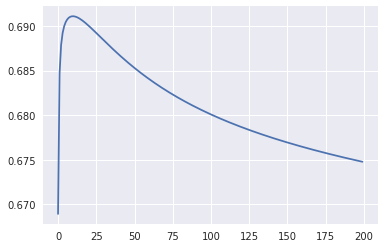

In [764]:
plt.plot(test_scores, label = 'Lasso', alpha = 1)


In [765]:
model = sklearn.linear_model.Ridge(alpha = 12)
cross_val = sklearn.model_selection.cross_validate(model, train_X, train_Y, cv=20,return_train_score=True)
for name, arr in cross_val.items(): print(str(name) + ': ' + str(np.mean(arr)))

fit_time: 0.002511477470397949
score_time: 0.0005710601806640625
test_score: 0.6910011523453953
train_score: 0.8017770438714937


### Improved Ridge Test Score to .69. Optimal Alpha at 12

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/pyt

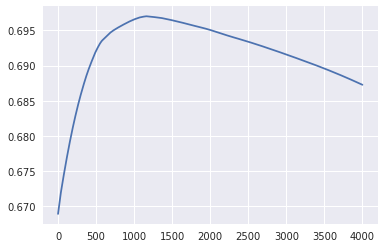

In [772]:
test_scores = []
for i in range(0,4000):
    model = sklearn.linear_model.Lasso(alpha = i)
    cross_val = sklearn.model_selection.cross_validate(model, train_X, train_Y, cv=20,return_train_score=True)
    test_scores.append(np.mean(cross_val['test_score']))
    
plt.plot(test_scores, label = 'Lasso', alpha = 1)

In [773]:
model = sklearn.linear_model.Lasso(alpha = 1200)
cross_val = sklearn.model_selection.cross_validate(model, train_X, train_Y, cv=20,return_train_score=True)
for name, arr in cross_val.items(): print(str(name) + ': ' + str(np.mean(arr)))

fit_time: 0.0020616650581359863
score_time: 0.0005331158638000489
test_score: 0.6969680199807289
train_score: 0.8015423047712833


### Improved Lasso's score to 0.69 as well. Optimal alpha at 1200

### Summary and Interpretation: Even though Lasso and Ridge regression showed great promise in theory, their practical applications are yet to be seen. Using either Lasso or Ridge doesn't seem to improve the scores of the regression by a lot. Feature selection doesn't appear to help much either. While some features appear to be correlated, including them doesn't appear to adversely affect the score of the regression. For further improvement we could try and use p-values for feature selection or use a better algorithm altogether.